# Random Forest Model For Credit Risk Modeling Project

This project applies data science techniques to predict credit risk from the dataset **CREDIT RISK - PAKDD 2010**.
The flow includes:
- Data download and conversion
- Preprocessing: cleaning, imputation, and encoding
- Splitting data into training and test sets
- Class balancing with SMOTE (optional)
- Training Random Forest models with different strategies
- Performance evaluation with appropriate metrics
- Conclusion of the observed results


--------------------
### **📌** For this experimental search process using the Random Forest model, numerous tests were performed with various data engineering methods, different data splits, and various hyperparameter approaches. Since the results were very similar, only a few will be presented here.
--------------------

## **1️⃣** Imports

> ###  In this section, we import essential libraries for data manipulation, machine learning, visualization, and utilities to support the workflow of the credit risk modeling project.

In [1]:
import pandas as pd
import numpy as np
import os
from src.data_utils import *

## **2️⃣** Data Download and Conversion

> ### This section handles downloading the dataset and converting the provided TXT data into a CSV format using the provided Excel file containing column names, preparing it for preprocessing and analysis.

In [2]:
# Input variables
path_txt = 'data/original/PAKDD2010_Modeling_Data.txt'
path_columns = 'data/original/PAKDD2010_VariablesList.XLS'
out_csv = 'data/original/dataset.csv'

# Download data
download_credit_data()

# Generate CSV
convert_txt_to_csv(path_txt, path_columns, out_csv)
print('CSV created.')

Download completed.
Loaded 54 column names from XLS.


c:\Users\Administrador\Documents\Personales\Pedro\Capacitacion\AnyoneAI\Final Proyect 2\CreditRiskAnalysisProject\data\modeling_data\random_forest2\src\data_utils.py:81: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(txt_path, sep='\t', header=None, encoding='cp1252')


TXT file shape: (50000, 54)
CSV saved to data/original/dataset.csv with correct column names.
CSV created.


## **3️⃣** Data Loading and Preprocessing

> ### Here, we load the cleaned CSV data and apply preprocessing steps, including cleaning missing values, encoding categorical variables, and ensuring the dataset is structured correctly for modeling.

In [3]:
df = pd.read_csv('data/original/dataset.csv')
df = preprocess_credit_data(df)
df.to_csv('data/preprocessed/dataset_preprocessed.csv', index=False)
df.head()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7800\3898811943.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/original/dataset.csv')


,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,...,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,PROFESSION_CODE,OCCUPATION_TYPE,EDUCATION_LEVEL.1,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,5,0.56412,0.6161,6,1,0.04016,0.00114,1,0.04054,0.00004,...,0.7302,0.73064,9.0,4.0,0.0,1,32,0.00174,0.00174,1
1,15,0.04666,0.6161,2,0,0.03652,0.02916,1,0.04286,0.01442,...,0.7302,0.73064,11.0,4.0,0.0,1,34,0.00734,0.00734,1
2,5,0.56412,0.6161,2,0,0.04016,0.00104,1,0.04054,0.00464,...,0.7302,0.73064,11.0,2.0,0.0,1,27,0.01678,0.01678,0
3,20,0.56412,0.6161,2,0,0.08196,0.00186,1,0.07340,0.00114,...,0.7302,0.73064,9.0,2.0,0.0,1,61,0.00260,0.00260,0
4,10,0.56412,0.3826,2,0,0.03652,0.02916,1,0.04286,0.01442,...,0.7302,0.73064,9.0,5.0,0.0,1,48,0.00242,0.00242,1


## **4️⃣** Data Splitting (Train/Test)

> ### In this step, we split the dataset into training and testing sets while maintaining class distribution, enabling robust model evaluation on unseen data.

In [4]:
split_and_save(df, 'TARGET_LABEL_BAD=1', 'data/splitted')
print(os.listdir('data/splitted'))

Data split and saved to data/splitted.
['X_test.csv', 'X_train.csv', 'y_test.csv', 'y_train.csv']


## **5️⃣** Applying SMOTE (Optional)

> ### This section applies the SMOTE technique to balance the classes in the training data, which can help improve the model’s ability to learn minority class patterns during training.

In [5]:
apply_smote('data/splitted', 'data/splitted/balanced')
print('Balanced data generated.')

SMOTE applied. Balanced data saved to data/splitted/balanced.
Balanced data generated.


## **6️⃣** Load Splitted And Balanced Datasets

> ### Here, we load the training and testing datasets, including the balanced datasets created with SMOTE, to prepare them for model training and evaluation.

In [6]:
X_train_balanced = pd.read_csv('data/splitted/balanced/X_train_smote.csv')
y_train_balanced = pd.read_csv('data/splitted/balanced/y_train_smote.csv').iloc[:, 0]
X_train = pd.read_csv('data/splitted/X_train.csv')
y_train = pd.read_csv('data/splitted/y_train.csv').iloc[:, 0]
X_test = pd.read_csv('data/splitted/X_test.csv')
y_test = pd.read_csv('data/splitted/y_test.csv').iloc[:, 0]

## **7️⃣** Training Basic Random Forest - Smote Balance

> ### In this section, we train a baseline Random Forest model on the dataset balanced with SMOTE, serving as a benchmark to compare with other strategies.

✅ Best hyperparameters found:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

🧪 Evaluation on Training Set:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     27719
           1       0.97      0.65      0.78     27719

    accuracy                           0.82     55438
   macro avg       0.85      0.82      0.81     55438
weighted avg       0.85      0.82      0.81     55438


🔹 ROC AUC Score (Train): 0.9026
🔹 Accuracy (Train): 0.8150

📋 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.74      0.97      0.84    

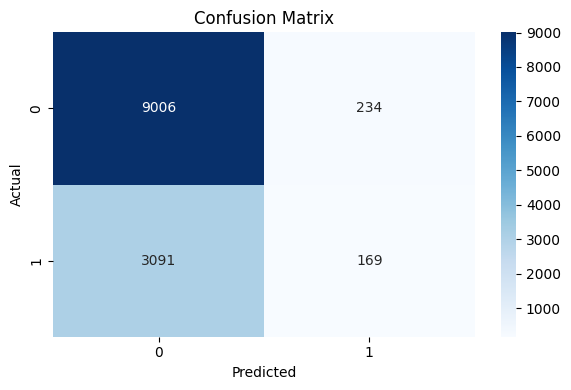

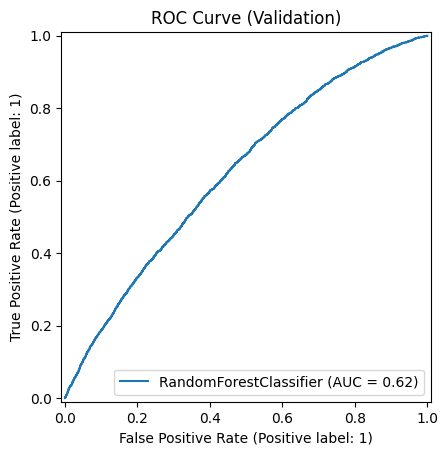


🔹 ROC AUC Score (Validation): 0.6229
🔹 Accuracy:        0.7340
🔹 Precision (1):   0.4194
🔹 Recall (1):      0.0518
🔹 F1-score (1):    0.0923
✅ Saving model to: src/rf_basic_smote_balance.pkl

✅ Model saved to: src/rf_basic_smote_balance.pkl


In [7]:
params = {'n_estimators':300,
        'max_depth':10,
        'min_samples_split':10,
        'min_samples_leaf':4,
        'max_features':'sqrt',
        'n_jobs':-1
        }
train_random_forest_model(X_train_balanced, y_train_balanced, X_test, y_test, params, 'src/rf_basic_smote_balance.pkl')

### **7️⃣**.**1️⃣** Training Basic Random Forest - Weigth Balance

> ### Here, we train a baseline Random Forest model using the class_weight='balanced' parameter instead of SMOTE, allowing the algorithm to handle imbalance internally.

✅ Best hyperparameters found:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

🧪 Evaluation on Training Set:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75     27719
           1       0.44      0.74      0.55      9781

    accuracy                           0.68     37500
   macro avg       0.66      0.70      0.65     37500
weighted avg       0.76      0.68      0.70     37500


🔹 ROC AUC Score (Train): 0.7765
🔹 Accuracy (Train): 0.6817

📋 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.80      0.60      0.

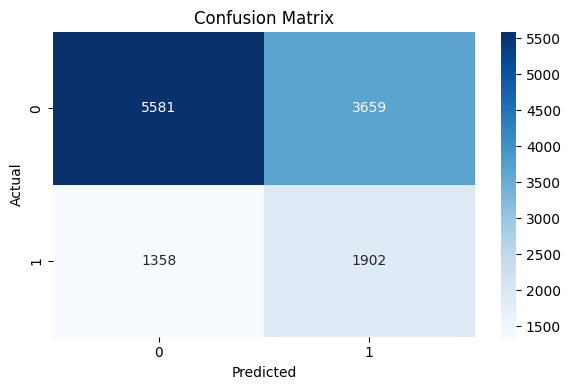

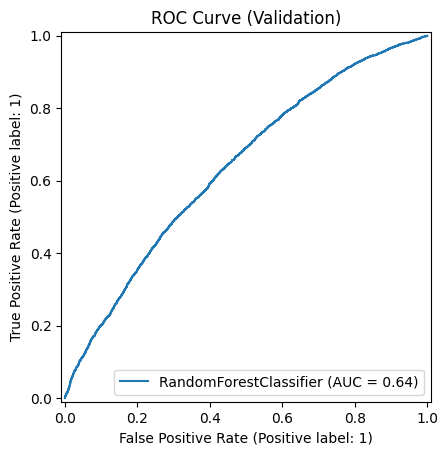


🔹 ROC AUC Score (Validation): 0.6367
🔹 Accuracy:        0.5986
🔹 Precision (1):   0.3420
🔹 Recall (1):      0.5834
🔹 F1-score (1):    0.4312
✅ Saving model to: src/rf_basic_weight_balance.pkl

✅ Model saved to: src/rf_basic_weight_balance.pkl


In [8]:
params = {'n_estimators':300,
        'max_depth':10,
        'min_samples_split':10,
        'min_samples_leaf':4,
        'max_features':'sqrt',
        'n_jobs':-1,
        'class_weight': 'balanced'}
train_random_forest_model(X_train, y_train, X_test, y_test, params, 'src/rf_basic_weight_balance.pkl')

## **8️⃣** Grid Search - Smote Balance

> ### This section applies Grid Search with cross-validation to find optimal hyperparameters for the Random Forest model trained on SMOTE-balanced data, aiming to improve performance.

Fitting 5 folds for each of 24 candidates, totalling 120 fits

🧪 Evaluation on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27719
           1       1.00      1.00      1.00     27719

    accuracy                           1.00     55438
   macro avg       1.00      1.00      1.00     55438
weighted avg       1.00      1.00      1.00     55438


🔹 ROC AUC Score (Train): 1.0000
🔹 Accuracy (Train): 1.0000

📋 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.75      0.97      0.84      9240
           1       0.46      0.08      0.13      3260

    accuracy                           0.74     12500
   macro avg       0.60      0.52      0.49     12500
weighted avg       0.67      0.74      0.66     12500



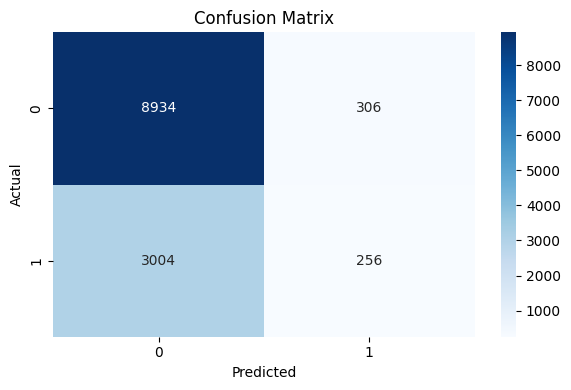

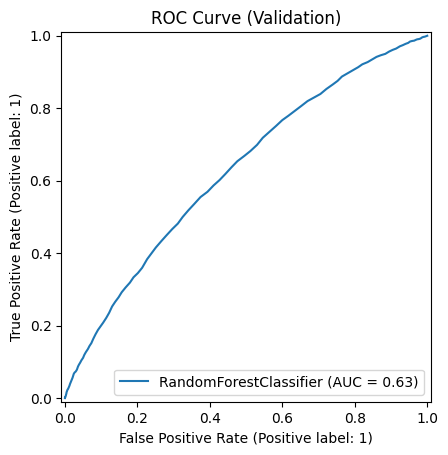


🔹 ROC AUC Score (Validation): 0.6263
🔹 Accuracy:        0.7352
🔹 Precision (1):   0.4555
🔹 Recall (1):      0.0785
🔹 F1-score (1):    0.1340
✅ Saving model to: src/rf_grid_search_smote_balance.pkl

✅ Model saved to: src/rf_grid_search_smote_balance.pkl


In [9]:
grid_search_random_forest(X_train_balanced, y_train_balanced, X_test, y_test,'f1', None, 'src/rf_grid_search_smote_balance.pkl')

### **8️⃣**.**1️⃣** Grid Search - Weigth Balance

> ### Here, we perform Grid Search hyperparameter tuning on the Random Forest model using the class_weight='balanced' strategy, allowing direct comparison with SMOTE-based training.

Fitting 5 folds for each of 24 candidates, totalling 120 fits

🧪 Evaluation on Training Set:
              precision    recall  f1-score   support

           0       0.83      0.51      0.63     27719
           1       0.34      0.70      0.45      9781

    accuracy                           0.56     37500
   macro avg       0.58      0.61      0.54     37500
weighted avg       0.70      0.56      0.58     37500


🔹 ROC AUC Score (Train): 0.6512
🔹 Accuracy (Train): 0.5589

📋 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.81      0.50      0.62      9240
           1       0.32      0.67      0.44      3260

    accuracy                           0.55     12500
   macro avg       0.57      0.59      0.53     12500
weighted avg       0.69      0.55      0.57     12500



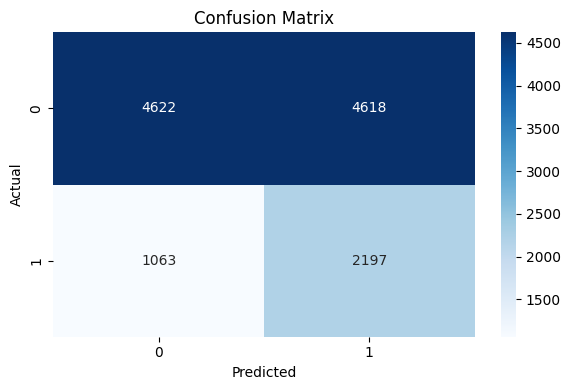

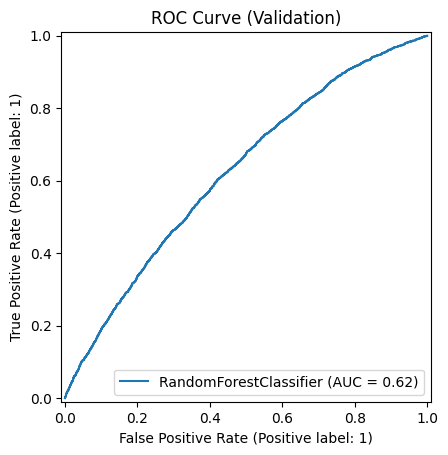


🔹 ROC AUC Score (Validation): 0.6236
🔹 Accuracy:        0.5455
🔹 Precision (1):   0.3224
🔹 Recall (1):      0.6739
🔹 F1-score (1):    0.4361
✅ Saving model to: src/rf_grid_search_weight_balance.pkl

✅ Model saved to: src/rf_grid_search_weight_balance.pkl


In [10]:
grid_search_random_forest(X_train, y_train, X_test, y_test,'f1', 'balanced', 'src/rf_grid_search_weight_balance.pkl')

## **9️⃣** Optimized Random Search (Top 17 Features) - Smote Balance

> ### In this section, we apply Randomized Search for hyperparameter tuning on the Random Forest model using SMOTE-balanced data, focusing on the top 17 most important features to improve performance and reduce noise.

Top 17 features selected.
Fitting 5 folds for each of 25 candidates, totalling 125 fits

🧪 Evaluation on Training Set:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     27719
           1       1.00      0.60      0.75      9781

    accuracy                           0.90     37500
   macro avg       0.94      0.80      0.84     37500
weighted avg       0.91      0.90      0.89     37500


🔹 ROC AUC Score (Train): 0.9991
🔹 Accuracy (Train): 0.8952

📋 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      9240
           1       0.52      0.02      0.04      3260

    accuracy                           0.74     12500
   macro avg       0.63      0.51      0.44     12500
weighted avg       0.68      0.74      0.64     12500



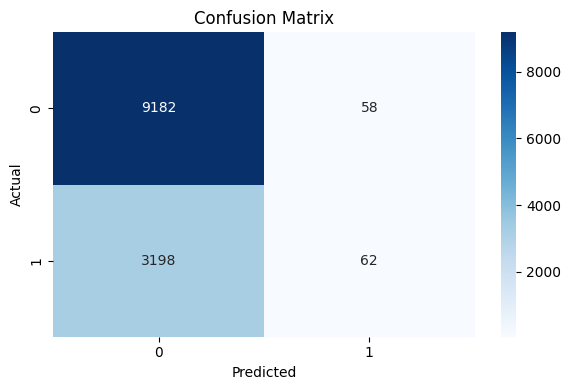

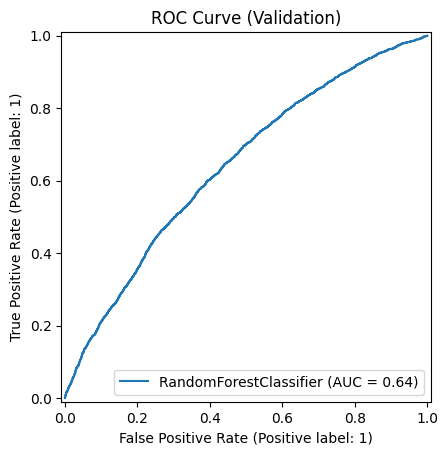


🔹 ROC AUC Score (Validation): 0.6401
🔹 Accuracy:        0.7395
🔹 Precision (1):   0.5167
🔹 Recall (1):      0.0190
🔹 F1-score (1):    0.0367
✅ Saving model to: src/rf_random_search_top17_smote_balance.pkl

✅ Model saved to: src/rf_random_search_top17_smote_balance.pkl


In [11]:
top_cols = select_top_features(X_train, y_train, top_n=17)
X_train_top = X_train[top_cols]
X_test_top = X_test[top_cols]
random_search_random_forest(X_train, y_train, X_test, y_test,'f1', None, 'src/rf_random_search_top17_smote_balance.pkl')

### **9️⃣**.**1️⃣** Optimized Random Search (Top 17 Features) - Weigth Balance

> ### Here, we apply Randomized Search on a Random Forest model using the class_weight='balanced' approach with the top 17 selected features, comparing the performance with SMOTE-based tuning.

Fitting 5 folds for each of 25 candidates, totalling 125 fits

🧪 Evaluation on Training Set:
              precision    recall  f1-score   support

           0       0.83      0.51      0.63     27719
           1       0.34      0.71      0.46      9781

    accuracy                           0.56     37500
   macro avg       0.58      0.61      0.54     37500
weighted avg       0.70      0.56      0.59     37500


🔹 ROC AUC Score (Train): 0.6518
🔹 Accuracy (Train): 0.5602

📋 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.81      0.50      0.62      9240
           1       0.32      0.67      0.44      3260

    accuracy                           0.55     12500
   macro avg       0.57      0.59      0.53     12500
weighted avg       0.68      0.55      0.57     12500



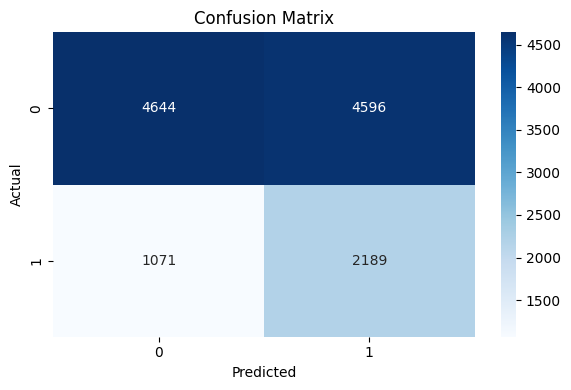

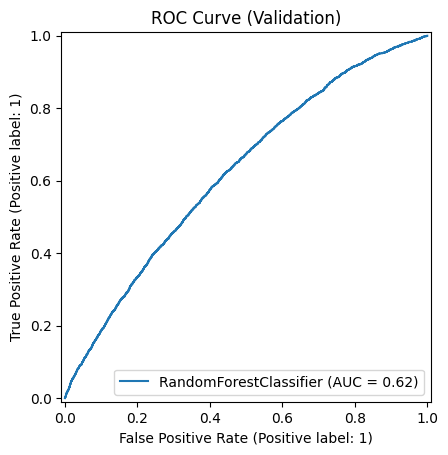


🔹 ROC AUC Score (Validation): 0.6232
🔹 Accuracy:        0.5466
🔹 Precision (1):   0.3226
🔹 Recall (1):      0.6715
🔹 F1-score (1):    0.4358
✅ Saving model to: src/rf_random_search_top17_weight_balance.pkl

✅ Model saved to: src/rf_random_search_top17_weight_balance.pkl


In [12]:
random_search_random_forest(X_train, y_train, X_test, y_test,'f1', 'balanced', 'src/rf_random_search_top17_weight_balance.pkl')

## **🔟** Conclusions

Conclusions
* The Random Forest model tends to overfit on the training set, achieving high AUC and accuracy, but with significantly lower metrics on the validation set.

* Using SMOTE alone often leads to overfitting, especially when the class imbalance is severe, highlighting the importance of combining it with proper hyperparameter tuning.

* The use of class_weight='balanced' provided more stable results across Random Forest, Grid Search, and Randomized Search experiments, improving validation recall and F1-score while controlling overfitting.

* Grid Search and Randomized Search did not significantly improve validation performance compared to the basic Random Forest, suggesting that feature selection, data quality, and potentially trying different models (e.g., XGBoost, LightGBM) may be required for further improvements.

* It is important to monitor recall on the minority class (1), as the models often show high accuracy driven by the majority class, while recall for the minority class remains low without balancing strategies.

* Future steps could include:

    -  Feature engineering and selection to reduce noise and improve signal.

    - Testing threshold calibration to improve recall without sacrificing too much precision.

    - Trying other ensemble methods and advanced models that may handle imbalance better.